<a href="https://colab.research.google.com/github/DJCordhose/ml-workshop/blob/master/notebooks/tf2/time-series-skeleton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Skeleton for Time Series data

* Idea and some code taken from, and also OPSD time series data set explained here: https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/

In [1]:
import pandas as pd
print(pd.__version__)

0.25.1


In [2]:
import numpy as np
print(np.__version__)

1.17.1


## Standard Case: explicit time stamp

* each entry belongs to one time stamp
* we just have a sequence of events

_let me know if your case looks different_

In [3]:
pd.read_csv?

In [4]:
# for local
url = 'opsd_germany_daily.csv'

# for colab
# url = 'https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv'

time_series_df = pd.read_csv(url, 
                             sep=',', 
                             index_col=0, # you can use the date as the index for pandas
                             parse_dates=[0]) # where is the time stamp?

In [5]:
time_series_df.shape

(4383, 4)

In [6]:
time_series_df.dtypes

Consumption    float64
Wind           float64
Solar          float64
Wind+Solar     float64
dtype: object

In [7]:
time_series_df.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


In [8]:
time_series_df.tail()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2017-12-27,1263.94091,394.507,16.530,411.037
2017-12-28,1299.86398,506.424,14.162,520.586
2017-12-29,1295.08753,584.277,29.854,614.131
2017-12-30,1215.44897,721.247,7.467,728.714
2017-12-31,1107.11488,721.176,19.980,741.156


In [9]:
time_series_df.describe()

,Consumption,Wind,Solar,Wind+Solar
count,4383.000000,2920.000000,2188.000000,2187.000000
mean,1338.675836,164.814173,89.258695,272.663481
std,165.775710,143.692732,58.550099,146.319884
min,842.395000,5.757000,1.968000,21.478000
25%,1217.859000,62.353250,35.179250,172.185500
50%,1367.123000,119.098000,86.407000,240.991000
75%,1457.761000,217.900250,135.071500,338.988000
max,1709.568000,826.278000,241.580000,851.556000


In [10]:
# just january 2017
time_series_df['2017-01']

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2017-01-01,1130.413,307.125,35.291,342.416
2017-01-02,1441.052,295.099,12.479,307.578
2017-01-03,1529.990,666.173,9.351,675.524
2017-01-04,1553.083,686.578,12.814,699.392
2017-01-05,1547.238,261.758,20.797,282.555
2017-01-06,1501.795,115.723,33.341,149.064
2017-01-07,1405.145,252.307,8.387,260.694
2017-01-08,1301.011,41.261,4.991,46.252
2017-01-09,1604.348,190.983,7.070,198.053


In [11]:
# exactly what you think it does
time_series_df['2017-01-01': '2017-01-05']

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2017-01-01,1130.413,307.125,35.291,342.416
2017-01-02,1441.052,295.099,12.479,307.578
2017-01-03,1529.990,666.173,9.351,675.524
2017-01-04,1553.083,686.578,12.814,699.392
2017-01-05,1547.238,261.758,20.797,282.555


In [12]:
# if you want to train just on January data
x = time_series_df['2017-01'].to_numpy()
x

array([[1130.413,  307.125,   35.291,  342.416],
       [1441.052,  295.099,   12.479,  307.578],
       [1529.99 ,  666.173,    9.351,  675.524],
       [1553.083,  686.578,   12.814,  699.392],
       [1547.238,  261.758,   20.797,  282.555],
       [1501.795,  115.723,   33.341,  149.064],
       [1405.145,  252.307,    8.387,  260.694],
       [1301.011,   41.261,    4.991,   46.252],
       [1604.348,  190.983,    7.07 ,  198.053],
       [1639.046,  280.373,   13.045,  293.418],
       [1654.809,  637.259,    7.379,  644.638],
       [1620.597,  584.792,   17.865,  602.657],
       [1608.895,  518.618,   14.311,  532.929],
       [1392.736,  487.189,   16.767,  503.956],
       [1289.904,  229.77 ,   16.105,  245.875],
       [1605.465,   69.209,   17.6  ,   86.809],
       [1649.104,   79.363,   22.909,  102.272],
       [1669.395,  148.915,   22.709,  171.624],
       [1667.477,  121.272,   38.191,  159.463],
       [1641.737,  109.383,   39.633,  149.016],
       [1423.02 ,   

In [13]:
time_series_df.plot?

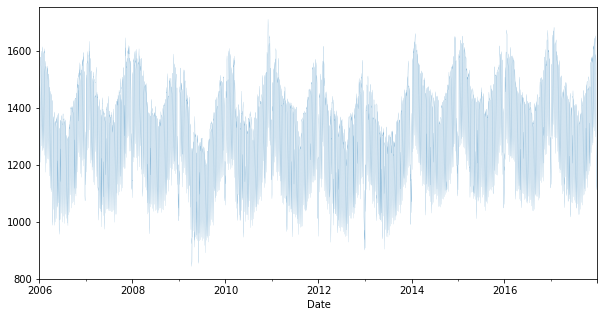

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 5))
time_series_df['Consumption'].plot(linewidth=0.1)

## More Visualization, ignore from here on

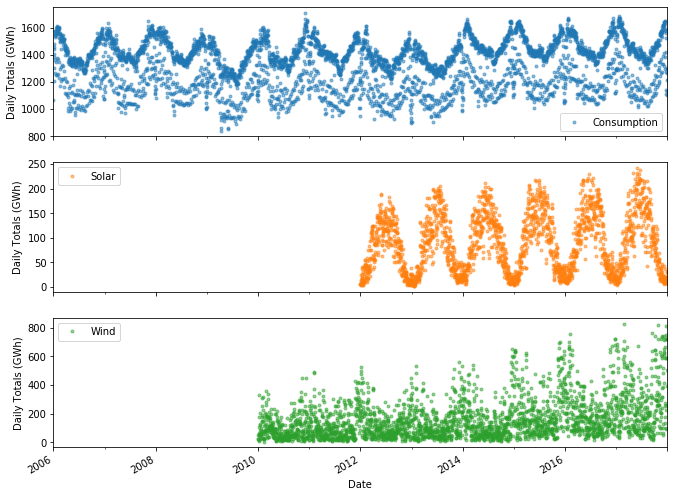

In [15]:
cols_plot = ['Consumption', 'Solar', 'Wind']

axes = time_series_df[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Totals (GWh)')

In [16]:
df_2017 = time_series_df['2017']
df_2017.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2017-01-01,1130.413,307.125,35.291,342.416
2017-01-02,1441.052,295.099,12.479,307.578
2017-01-03,1529.990,666.173,9.351,675.524
2017-01-04,1553.083,686.578,12.814,699.392
2017-01-05,1547.238,261.758,20.797,282.555


Text(0, 0.5, 'Daily Consumption (GWh)')

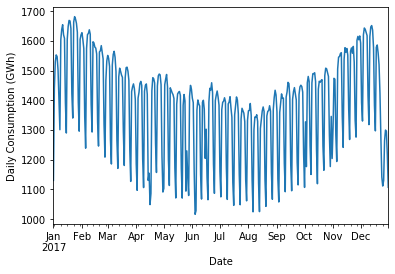

In [17]:
df_2017['Consumption'].plot()
plt.ylabel('Daily Consumption (GWh)')

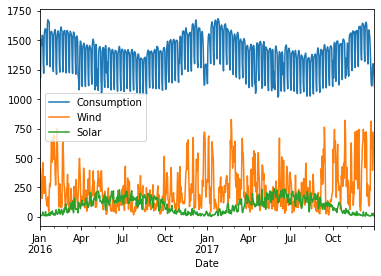

In [18]:
time_series_df['2016':'2017'][['Consumption', 'Wind', 'Solar']].plot()

Text(0, 0.5, 'Daily Consumption (GWh)')

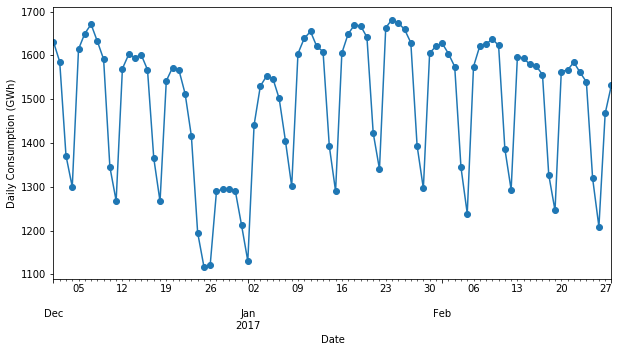

In [19]:
plt.figure(figsize=(10, 5))

time_series_df['2016-12':'2017-2']['Consumption'].plot(marker='o')
plt.ylabel('Daily Consumption (GWh)')

In [20]:
import matplotlib.dates as mdates

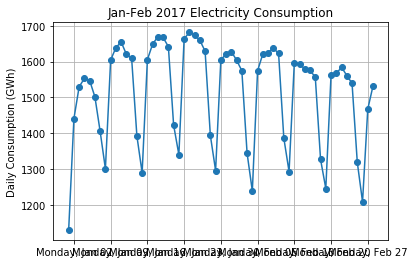

In [21]:
fig, ax = plt.subplots()
ax.grid(True)
ax.plot(time_series_df['2017-01':'2017-02']['Consumption'], marker='o', linestyle='-')
ax.set_ylabel('Daily Consumption (GWh)')
ax.set_title('Jan-Feb 2017 Electricity Consumption')
# Set x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('Monday, %b %d'));

In [22]:
opsd_7d = time_series_df.rolling(7, center=True).mean()
opsd_7d.head(10)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,NaN,NaN,NaN,NaN
2006-01-02,NaN,NaN,NaN,NaN
2006-01-03,NaN,NaN,NaN,NaN
2006-01-04,1361.471429,NaN,NaN,NaN
2006-01-05,1381.300143,NaN,NaN,NaN
2006-01-06,1402.557571,NaN,NaN,NaN
2006-01-07,1421.754429,NaN,NaN,NaN
2006-01-08,1438.891429,NaN,NaN,NaN
2006-01-09,1449.769857,NaN,NaN,NaN


In [23]:
opsd_weekly_mean = time_series_df.resample('W').mean()
opsd_weekly_mean.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184000,NaN,NaN,NaN
2006-01-08,1381.300143,NaN,NaN,NaN
2006-01-15,1486.730286,NaN,NaN,NaN
2006-01-22,1490.031143,NaN,NaN,NaN
2006-01-29,1514.176857,NaN,NaN,NaN


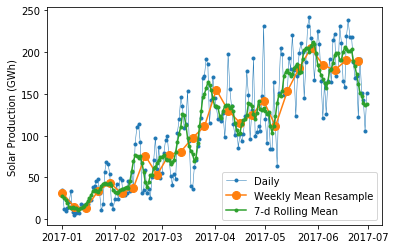

In [24]:
# Start and end of the date range to extract
start, end = '2017-01', '2017-06'
# Plot daily, weekly resampled, and 7-day rolling mean time series together
fig, ax = plt.subplots()
ax.plot(time_series_df[start:end]['Solar'],
marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(opsd_weekly_mean.loc[start:end, 'Solar'],
marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')
ax.plot(opsd_7d.loc[start:end, 'Solar'],
marker='.', linestyle='-', label='7-d Rolling Mean')
ax.set_ylabel('Solar Production (GWh)')
ax.legend();

## Classic Models

In [25]:
y = time_series_df['2016-12': '2017-2']['Consumption'].to_numpy()

In [26]:
y.shape

(90,)

In [27]:
X = np.arange(len(y)).reshape(-1, 1)

In [28]:
X.shape

(90, 1)

In [29]:
from sklearn.linear_model import SGDRegressor 

est = SGDRegressor(tol=None, max_iter=10000)
est.fit(X, y)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=10000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=None, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [30]:
est.score(X, y)

-1.9500850252751158

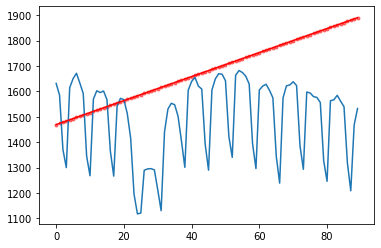

In [31]:
plt.plot(X, y)

# we can either plot using line parameters 
a = est.coef_; b = est.intercept_
lreg = a*X + b
plt.plot(X, lreg, c='red')

# or plot predicted points
y_pred = est.predict(X)
plt.scatter(X, y_pred, marker='.', alpha=0.5, color='red')



In [32]:
# https://ogrisel.github.io/scikit-learn.org/sklearn-tutorial/auto_examples/svm/plot_svm_regression.html

from sklearn.svm import SVR

In [33]:
%%time

svr_lin = SVR(kernel='linear', C=1e4)
y_lin = svr_lin.fit(X, y).predict(X)

Wall time: 1.08 s


In [34]:
svr_lin.score(X, y)

-0.236278875385578

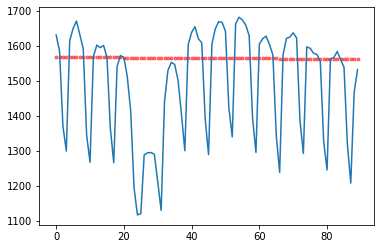

In [35]:
plt.plot(X, y)
plt.scatter(X, y_lin, marker='.', alpha=0.5, color='red')

In [36]:
%%time

svr_rbf = SVR(kernel='rbf', C=1e4, gamma=0.1)
y_rbf = svr_rbf.fit(X, y).predict(X)

Wall time: 20 ms


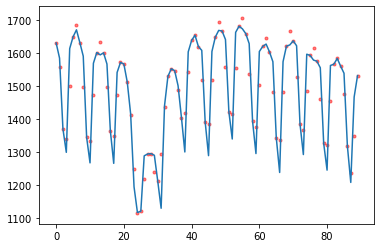

In [37]:
plt.plot(X, y)
plt.scatter(X, y_rbf, marker='.', alpha=0.5, color='red')

In [38]:
svr_rbf.score(X, y)

0.8688596891435212

In [39]:
# does not terminate within any reasonable amount of time
# %%time 

# svr_poly = SVR(kernel='poly', C=1e4, max_iter=1000)
# y_poly = svr_poly.fit(X, y).predict(X)

### Evaluation

In [40]:
y_test = time_series_df['2017-2': '2017-3']['Consumption'].to_numpy()
y_test.shape

(59,)

In [41]:
X_test = np.arange(len(y), len(y) + len(y_test)).reshape(-1, 1)
X_test.shape

(59, 1)

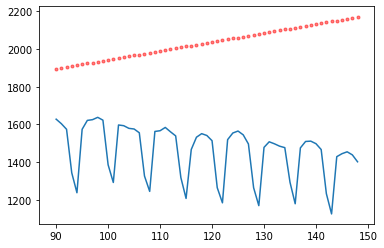

In [42]:
plt.plot(X_test, y_test)

y_test_pred = est.predict(X_test)
plt.scatter(X_test, y_test_pred, marker='.', alpha=0.5, color='red')

In [43]:
est.score(X_test, y_test)

-17.842887364891517

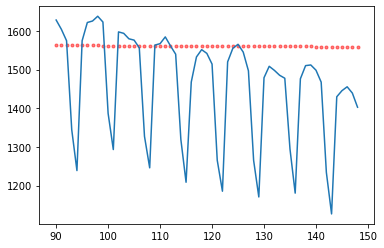

In [44]:
plt.plot(X_test, y_test)

y_lin = svr_lin.predict(X_test)

plt.scatter(X_test, y_lin, marker='.', alpha=0.5, color='red')

In [45]:
svr_lin.score(X_test, y_test)

-0.5385690425898566

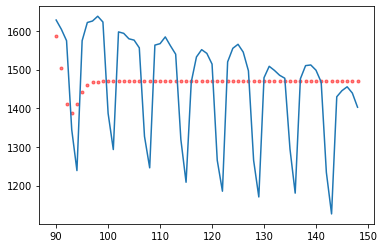

In [46]:
plt.plot(X_test, y_test)

y_rbf = svr_rbf.predict(X_test)

plt.scatter(X_test, y_rbf, marker='.', alpha=0.5, color='red')

In [47]:
svr_rbf.score(X_test, y_test)

0.03204329980888687

### Statistical Methods directly geared towards forecasting

* https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/
* https://towardsdatascience.com/an-end-to-end-project-on-time-series-analysis-and-forecasting-with-python-4835e6bf050b#targetText=Time%20series%20forecasting%20is%20the,forecasting%20retail%20sales%20time%20series.
* https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/

In [48]:
# https://www.statsmodels.org
import statsmodels.api as sm

In [49]:
decomposition = sm.tsa.seasonal_decompose(time_series_df['2017']['Consumption'], model='additive')

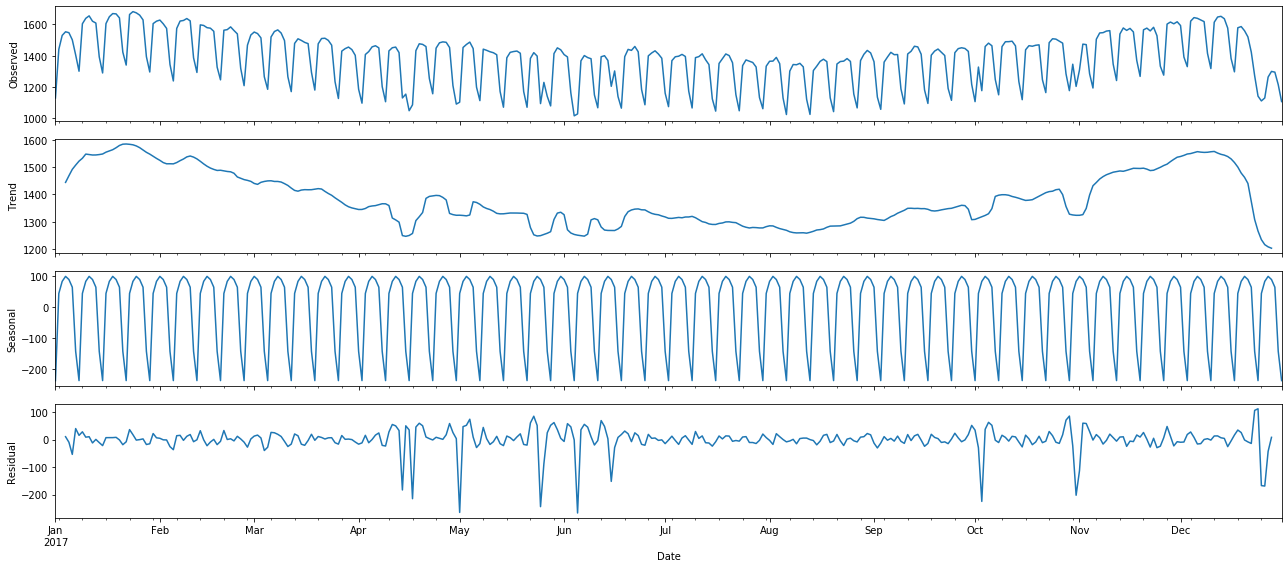

In [50]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

fig = decomposition.plot()

### Recurrent Neural Networks

In [51]:
days_2016_2017 = time_series_df['2016': '2017']['Consumption'].to_numpy()
days_2016_2017.shape

(731,)

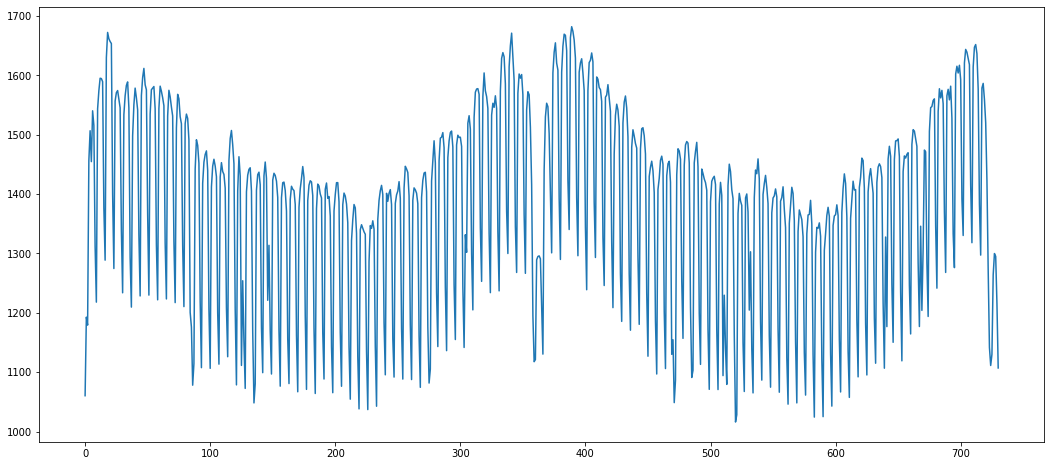

In [52]:
plt.plot(days_2016_2017)

In [53]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps_in, n_steps_out):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps_in
		out_end_ix = end_ix + n_steps_out
		# check if we are beyond the sequence
		if out_end_ix > len(sequence):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

### For each week predict the next one

In [86]:
n_steps_in, n_steps_out = 7, 14
X, Y = split_sequence(days_2016_2017, n_steps_in, n_steps_out)
X.shape, Y.shape

((711, 7), (711, 14))

In [87]:
X[0], Y[0]

(array([1060.366, 1192.698, 1179.282, 1456.294, 1506.737, 1454.685,
        1540.304]),
 array([1515.84 , 1311.996, 1217.985, 1543.692, 1574.058, 1595.181,
        1594.6  , 1589.38 , 1376.513, 1288.699, 1629.911, 1672.32 ,
        1661.646, 1657.049]))

In [88]:
X[1], Y[1]

(array([1192.698, 1179.282, 1456.294, 1506.737, 1454.685, 1540.304,
        1515.84 ]),
 array([1311.996, 1217.985, 1543.692, 1574.058, 1595.181, 1594.6  ,
        1589.38 , 1376.513, 1288.699, 1629.911, 1672.32 , 1661.646,
        1657.049, 1653.635]))

In [89]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
X.shape

(711, 7, 1)

In [90]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, LSTM, GRU, SimpleRNN, Bidirectional
from tensorflow.keras.models import Sequential, Model

model = Sequential()
model.add(GRU(100, activation='relu', input_shape=(n_steps_in, n_features)))
# model.add(GRU(100, activation='relu', return_sequences=True, input_shape=(n_steps_in, n_features)))
# model.add(GRU(100, activation='relu'))
model.add(Dense(n_steps_out))
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_2 (GRU)                  (None, 100)               30900     
_________________________________________________________________
dense_2 (Dense)              (None, 14)                1414      
Total params: 32,314
Trainable params: 32,314
Non-trainable params: 0
_________________________________________________________________


In [ ]:
%%time

history = model.fit(X, Y, epochs=200, verbose=0)

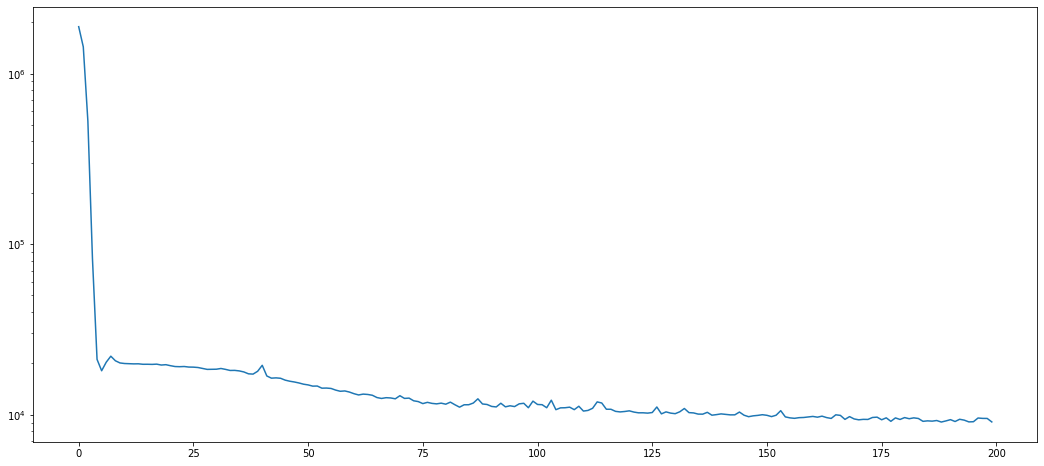

In [60]:
import matplotlib.pyplot as plt

plt.yscale('log')
plt.plot(history.history['loss'])

In [61]:
model.evaluate(X, Y, verbose=0)

8834.390320334262

In [62]:
final_week_2017 = X[-1]
final_week_2017

array([[1578.69079],
       [1586.4823 ],
       [1559.68569],
       [1520.37206],
       [1423.23782],
       [1272.17085],
       [1141.7573 ]])

In [63]:
first_week_2018 = model.predict(final_week_2017.reshape(1, 7, 1))

In [64]:
first_week_2018

array([[1404.3939, 1588.2194, 1528.3801, 1389.8298, 1370.6344, 1253.6882,
        1212.5096]], dtype=float32)

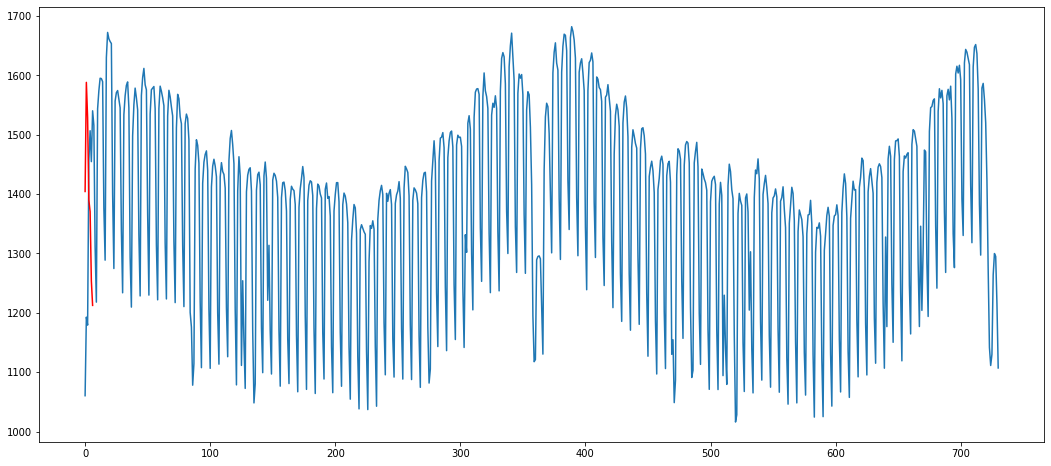

In [65]:
plt.plot(days_2016_2017)
plt.plot(first_week_2018[0], color='r')

In [66]:
known_x = np.arange(731)
pred_x = np.arange(731, 738)

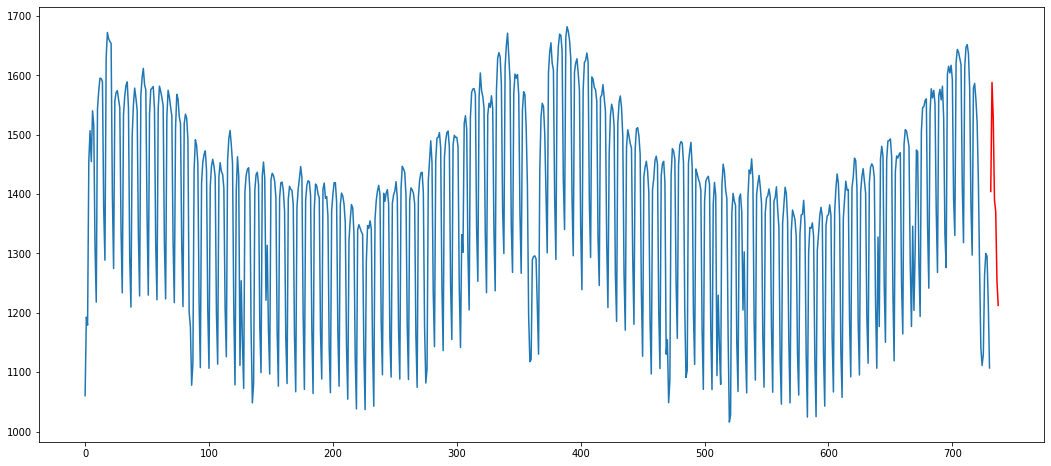

In [67]:
plt.plot(known_x, days_2016_2017)
plt.plot(pred_x, first_week_2018[0], color='r')

### For each month predict the next one

In [68]:
n_steps_in, n_steps_out = 30, 30
X, Y = split_sequence(days_2016_2017, n_steps_in, n_steps_out)
X.shape, Y.shape

((672, 30), (672, 30))

In [69]:
X[0], Y[0]

(array([1060.366, 1192.698, 1179.282, 1456.294, 1506.737, 1454.685,
        1540.304, 1515.84 , 1311.996, 1217.985, 1543.692, 1574.058,
        1595.181, 1594.6  , 1589.38 , 1376.513, 1288.699, 1629.911,
        1672.32 , 1661.646, 1657.049, 1653.635, 1400.292, 1274.629,
        1556.816, 1570.884, 1574.427, 1559.91 , 1545.318, 1339.319]),
 array([1233.714, 1533.857, 1565.493, 1583.04 , 1588.979, 1545.368,
        1293.588, 1209.617, 1498.211, 1550.349, 1578.526, 1562.214,
        1541.945, 1331.757, 1228.404, 1565.899, 1596.259, 1611.729,
        1584.18 , 1575.679, 1366.934, 1229.811, 1534.638, 1575.798,
        1578.573, 1581.22 , 1543.553, 1314.531, 1221.887, 1544.11 ]))

In [70]:
X[1], Y[1]

(array([1192.698, 1179.282, 1456.294, 1506.737, 1454.685, 1540.304,
        1515.84 , 1311.996, 1217.985, 1543.692, 1574.058, 1595.181,
        1594.6  , 1589.38 , 1376.513, 1288.699, 1629.911, 1672.32 ,
        1661.646, 1657.049, 1653.635, 1400.292, 1274.629, 1556.816,
        1570.884, 1574.427, 1559.91 , 1545.318, 1339.319, 1233.714]),
 array([1533.857, 1565.493, 1583.04 , 1588.979, 1545.368, 1293.588,
        1209.617, 1498.211, 1550.349, 1578.526, 1562.214, 1541.945,
        1331.757, 1228.404, 1565.899, 1596.259, 1611.729, 1584.18 ,
        1575.679, 1366.934, 1229.811, 1534.638, 1575.798, 1578.573,
        1581.22 , 1543.553, 1314.531, 1221.887, 1544.11 , 1581.822]))

In [71]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
X.shape

(672, 30, 1)

In [72]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, LSTM, GRU, SimpleRNN, Bidirectional
from tensorflow.keras.models import Sequential, Model

model = Sequential()
model.add(GRU(100, activation='relu', input_shape=(n_steps_in, n_features)))
# model.add(GRU(100, activation='relu', return_sequences=True, input_shape=(n_steps_in, n_features)))
# model.add(GRU(100, activation='relu'))
model.add(Dense(n_steps_out))
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (None, 100)               30900     
_________________________________________________________________
dense_1 (Dense)              (None, 30)                3030      
Total params: 33,930
Trainable params: 33,930
Non-trainable params: 0
_________________________________________________________________


In [73]:
%%time

history = model.fit(X, Y, epochs=200, verbose=0)

Wall time: 1min 40s


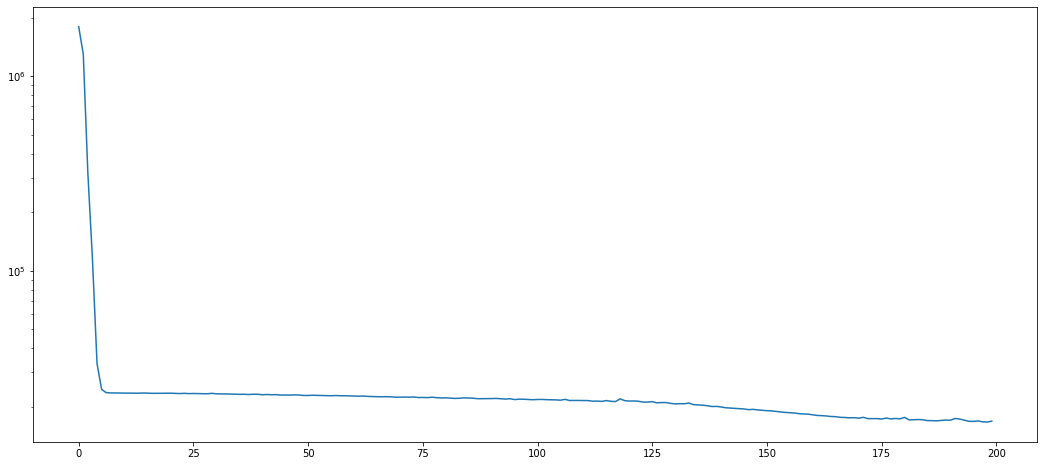

In [74]:
import matplotlib.pyplot as plt

plt.yscale('log')
plt.plot(history.history['loss'])

In [75]:
model.evaluate(X, Y, verbose=0)

16622.456473214286

In [76]:
final_2017 = X[-1]
final_2017

array([[1474.19484],
       [1471.18241],
       [1284.77485],
       [1193.85495],
       [1505.67173],
       [1545.63945],
       [1547.48171],
       [1557.63091],
       [1560.41732],
       [1346.43916],
       [1241.51495],
       [1538.83561],
       [1577.45348],
       [1562.03367],
       [1574.73479],
       [1552.2178 ],
       [1369.91888],
       [1268.00462],
       [1565.56805],
       [1576.49592],
       [1558.72998],
       [1581.7877 ],
       [1528.12694],
       [1333.15585],
       [1276.09818],
       [1602.17797],
       [1615.38061],
       [1603.98435],
       [1617.03309],
       [1592.96187]])

In [77]:
first_2018 = model.predict(final_2017.reshape(1, n_steps_in, 1))

In [78]:
first_2018

array([[1572.8462, 1550.3577, 1537.0142, 1546.7087, 1541.1858, 1516.4332,
        1551.9691, 1566.9185, 1553.3075, 1528.7596, 1546.0122, 1536.3826,
        1526.3269, 1587.9501, 1564.9153, 1545.6731, 1527.9243, 1542.961 ,
        1536.8524, 1532.4064, 1584.9994, 1572.3807, 1544.1656, 1529.4799,
        1536.    , 1527.55  , 1504.8693, 1550.5261, 1541.7764, 1532.1956]],
      dtype=float32)

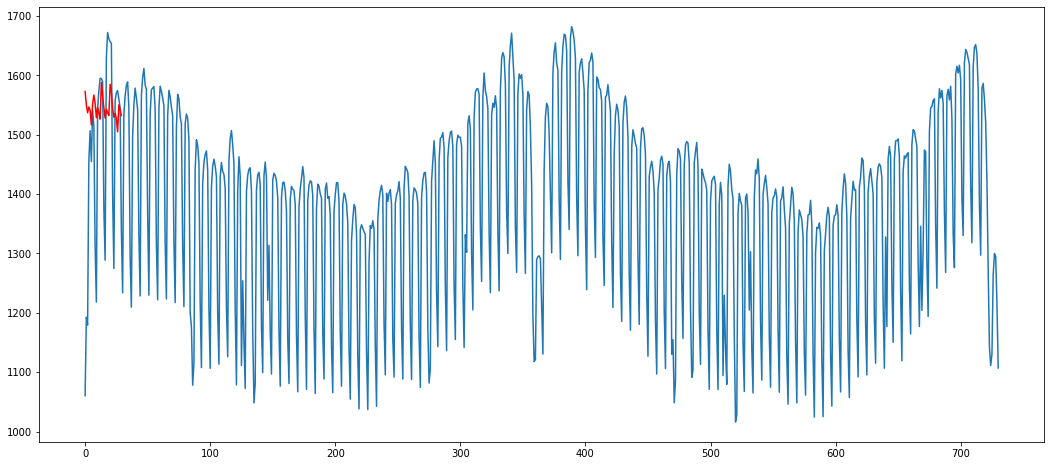

In [79]:
plt.plot(days_2016_2017)
plt.plot(first_2018[0], color='r')

In [82]:
known_x = np.arange(len(days_2016_2017))
pred_x = np.arange(len(days_2016_2017), len(days_2016_2017) + n_steps_out)

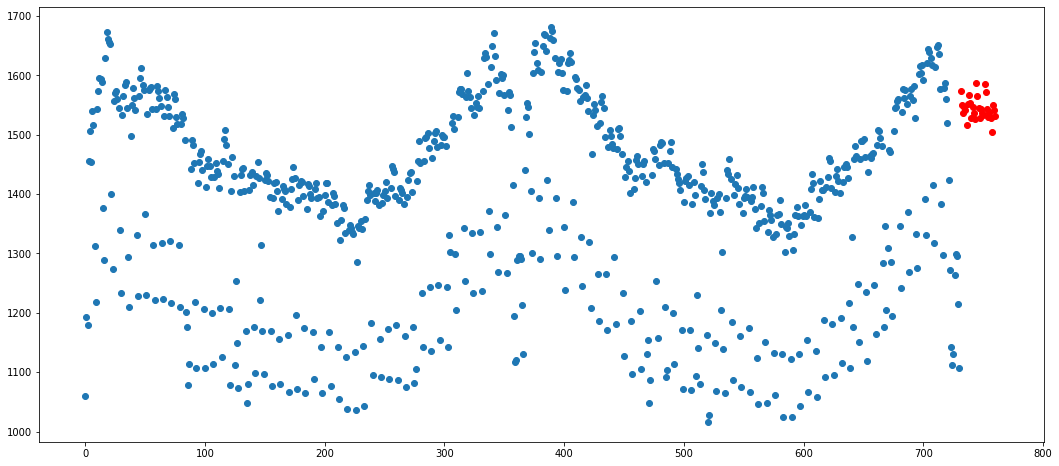

In [85]:
plt.scatter(known_x, days_2016_2017)
plt.scatter(pred_x, first_2018[0], color='r')